In [1]:
import math

In [2]:
Total_Entropy= ((9/14)*math.log2(14/9))+ ((5/14)*math.log2(14/5))
Total_Entropy

0.9402859586706311

In [3]:
math.log2(1)

0.0

In [4]:
Sunny_E= ((2/5)*math.log2(5/2))+ ((3/5)*math.log2(5/3))
Sunny_E

0.9709505944546687

In [5]:
Overcast_E=0

In [6]:
Rainy_E= ((3/5)*math.log2(5/3))+ ((2/5)*math.log2(5/2))
Rainy_E

0.9709505944546687

In [7]:
IG_outlook= Total_Entropy-((Sunny_E*(5/14))+0+(Rainy_E*(5/14)))
IG_outlook

0.24674981977443922

In [8]:
## Gini
TG= 1-((9/14)**2 +(5/14)**2)
TG

0.4591836734693877

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [168]:
df= pd.read_csv('horse.csv')

In [169]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [170]:
df.shape

(299, 28)

In [171]:
target=df[['outcome']]

In [172]:
features= df.drop(columns='outcome')

In [173]:
features.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no


In [174]:
features.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [175]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [176]:
features.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [177]:
cat_col= [i for i in features.columns if features[i].dtype=='O']
print(cat_col)

['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']


In [178]:
num_col= [i for i in features.columns if features[i].dtype!='O']
print(num_col)

['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [179]:
features[cat_col].head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no


In [180]:
features[num_col].head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,0


In [181]:
## cat_col
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [182]:
ord_enc= make_pipeline(OrdinalEncoder())
simp_imp= SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [183]:
transformer=ColumnTransformer([('ordinal',ord_enc,cat_col)])

In [184]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['surgery', 'age', 'temp_of_extremities',
                                  'peripheral_pulse', 'mucous_membrane',
                                  'capillary_refill_time', 'pain',
                                  'peristalsis', 'abdominal_distention',
                                  'nasogastric_tube', 'nasogastric_reflux',
                                  'rectal_exam_feces', 'abdomen',
                                  'abdomo_appearance', 'surgical_lesion',
                                  'cp_data'])])>

In [185]:
df1=pd.DataFrame(transformer.fit_transform(features[cat_col]),columns=transformer.get_feature_names_out())

In [186]:
df1=pd.DataFrame(simp_imp.fit_transform(df1),columns=df1.columns)

In [187]:
df1

,ordinal__surgery,ordinal__age,ordinal__temp_of_extremities,ordinal__peripheral_pulse,ordinal__mucous_membrane,ordinal__capillary_refill_time,ordinal__pain,ordinal__peristalsis,ordinal__abdominal_distention,ordinal__nasogastric_tube,ordinal__nasogastric_reflux,ordinal__rectal_exam_feces,ordinal__abdomen,ordinal__abdomo_appearance,ordinal__surgical_lesion,ordinal__cp_data
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,0.0,1.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0


In [189]:
## num_col
simp_imp1= SimpleImputer(missing_values=np.nan,strategy='median')
df2=pd.DataFrame(simp_imp1.fit_transform(features[num_col]),columns=num_col)

In [190]:
from sklearn.preprocessing import StandardScaler
std_sca= StandardScaler()

In [191]:
df2=pd.DataFrame(std_sca.fit_transform(df2),columns=df2.columns)

In [192]:
df2.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,-0.364592,0.496498,-0.194771,-0.087726,0.062143,-0.119170,-0.533355,-0.209831,1.415021,-0.139371,-0.057928
1,-0.361509,1.565603,0.604982,-0.588538,0.062143,0.385530,2.380057,-0.461797,-0.268864,-0.139371,-0.057928
2,-0.364440,0.191039,-1.139933,-0.338132,0.062143,-1.330449,-0.598013,-0.209831,-0.677797,-0.139371,-0.057928
3,2.747804,1.412873,3.367763,3.417962,0.062143,0.183650,-0.578996,2.309828,-0.268864,-0.139371,-0.057928
4,-0.364491,-1.336253,1.186620,0.350485,0.062143,2.808088,-0.571389,-0.209831,0.118585,-0.139371,-0.057928


In [193]:
df_new=pd.concat([df1,df2],axis=1)

In [194]:
df_new

,ordinal__surgery,ordinal__age,ordinal__temp_of_extremities,ordinal__peripheral_pulse,ordinal__mucous_membrane,ordinal__capillary_refill_time,ordinal__pain,ordinal__peristalsis,ordinal__abdominal_distention,ordinal__nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,...,0.496498,-0.194771,-0.087726,0.062143,-0.119170,-0.533355,-0.209831,1.415021,-0.139371,-0.057928
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,...,1.565603,0.604982,-0.588538,0.062143,0.385530,2.380057,-0.461797,-0.268864,-0.139371,-0.057928
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,...,0.191039,-1.139933,-0.338132,0.062143,-1.330449,-0.598013,-0.209831,-0.677797,-0.139371,-0.057928
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,...,1.412873,3.367763,3.417962,0.062143,0.183650,-0.578996,2.309828,-0.268864,-0.139371,-0.057928
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,...,-1.336253,1.186620,0.350485,0.062143,2.808088,-0.571389,-0.209831,0.118585,-0.139371,-0.057928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,...,0.038310,1.768258,2.541540,0.062143,0.890229,1.619375,-0.209831,-0.084214,-0.139371,-0.057928
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,...,-1.488983,0.023343,-0.338132,0.062143,-0.220110,-0.567586,0.630055,-0.268864,-0.139371,-0.057928
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,...,-1.030795,0.023343,0.037477,0.062143,1.394929,-0.594210,-0.209831,-0.084214,-0.139371,-0.057928
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,...,-2.558088,1.041210,-0.338132,0.062143,0.385530,-0.624637,0.714044,-0.268864,-0.139371,-0.057928


In [195]:
import scipy.stats as stats

In [196]:
## outlier removal
def outlier_remove_z_score(df,columns):
    thershold= 3
    z_score= stats.zscore(df[columns])
    return df[(abs(z_score)<thershold).all(axis=1)]

In [197]:
df_new1=outlier_remove_z_score(df_new,df_new.columns)

In [198]:
df_new1

,ordinal__surgery,ordinal__age,ordinal__temp_of_extremities,ordinal__peripheral_pulse,ordinal__mucous_membrane,ordinal__capillary_refill_time,ordinal__pain,ordinal__peristalsis,ordinal__abdominal_distention,ordinal__nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,...,0.496498,-0.194771,-0.087726,0.062143,-0.119170,-0.533355,-0.209831,1.415021,-0.139371,-0.057928
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,...,1.565603,0.604982,-0.588538,0.062143,0.385530,2.380057,-0.461797,-0.268864,-0.139371,-0.057928
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,...,0.191039,-1.139933,-0.338132,0.062143,-1.330449,-0.598013,-0.209831,-0.677797,-0.139371,-0.057928
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,...,-1.336253,1.186620,0.350485,0.062143,2.808088,-0.571389,-0.209831,0.118585,-0.139371,-0.057928
5,0.0,0.0,3.0,2.0,5.0,1.0,1.0,2.0,3.0,2.0,...,0.038310,-0.267476,-0.275531,0.062143,-0.119170,-0.567586,-0.209831,-0.677797,-0.139371,-0.057928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,...,0.038310,1.768258,2.541540,0.062143,0.890229,1.619375,-0.209831,-0.084214,-0.139371,-0.057928
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,...,-1.488983,0.023343,-0.338132,0.062143,-0.220110,-0.567586,0.630055,-0.268864,-0.139371,-0.057928
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,...,-1.030795,0.023343,0.037477,0.062143,1.394929,-0.594210,-0.209831,-0.084214,-0.139371,-0.057928
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,...,-2.558088,1.041210,-0.338132,0.062143,0.385530,-0.624637,0.714044,-0.268864,-0.139371,-0.057928


In [199]:
df_new1

,ordinal__surgery,ordinal__age,ordinal__temp_of_extremities,ordinal__peripheral_pulse,ordinal__mucous_membrane,ordinal__capillary_refill_time,ordinal__pain,ordinal__peristalsis,ordinal__abdominal_distention,ordinal__nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,...,0.496498,-0.194771,-0.087726,0.062143,-0.119170,-0.533355,-0.209831,1.415021,-0.139371,-0.057928
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,...,1.565603,0.604982,-0.588538,0.062143,0.385530,2.380057,-0.461797,-0.268864,-0.139371,-0.057928
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,...,0.191039,-1.139933,-0.338132,0.062143,-1.330449,-0.598013,-0.209831,-0.677797,-0.139371,-0.057928
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,...,-1.336253,1.186620,0.350485,0.062143,2.808088,-0.571389,-0.209831,0.118585,-0.139371,-0.057928
5,0.0,0.0,3.0,2.0,5.0,1.0,1.0,2.0,3.0,2.0,...,0.038310,-0.267476,-0.275531,0.062143,-0.119170,-0.567586,-0.209831,-0.677797,-0.139371,-0.057928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,...,0.038310,1.768258,2.541540,0.062143,0.890229,1.619375,-0.209831,-0.084214,-0.139371,-0.057928
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,...,-1.488983,0.023343,-0.338132,0.062143,-0.220110,-0.567586,0.630055,-0.268864,-0.139371,-0.057928
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,...,-1.030795,0.023343,0.037477,0.062143,1.394929,-0.594210,-0.209831,-0.084214,-0.139371,-0.057928
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,...,-2.558088,1.041210,-0.338132,0.062143,0.385530,-0.624637,0.714044,-0.268864,-0.139371,-0.057928


In [200]:
target.shape

(299, 1)

In [201]:
df_n=pd.merge(df_new1,target,left_index=True,right_index=True)

In [202]:
df_n

,ordinal__surgery,ordinal__age,ordinal__temp_of_extremities,ordinal__peripheral_pulse,ordinal__mucous_membrane,ordinal__capillary_refill_time,ordinal__pain,ordinal__peristalsis,ordinal__abdominal_distention,ordinal__nasogastric_tube,...,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,outcome
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,...,-0.194771,-0.087726,0.062143,-0.119170,-0.533355,-0.209831,1.415021,-0.139371,-0.057928,died
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,...,0.604982,-0.588538,0.062143,0.385530,2.380057,-0.461797,-0.268864,-0.139371,-0.057928,euthanized
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,...,-1.139933,-0.338132,0.062143,-1.330449,-0.598013,-0.209831,-0.677797,-0.139371,-0.057928,lived
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,...,1.186620,0.350485,0.062143,2.808088,-0.571389,-0.209831,0.118585,-0.139371,-0.057928,died
5,0.0,0.0,3.0,2.0,5.0,1.0,1.0,2.0,3.0,2.0,...,-0.267476,-0.275531,0.062143,-0.119170,-0.567586,-0.209831,-0.677797,-0.139371,-0.057928,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,...,1.768258,2.541540,0.062143,0.890229,1.619375,-0.209831,-0.084214,-0.139371,-0.057928,euthanized
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,...,0.023343,-0.338132,0.062143,-0.220110,-0.567586,0.630055,-0.268864,-0.139371,-0.057928,euthanized
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,...,0.023343,0.037477,0.062143,1.394929,-0.594210,-0.209831,-0.084214,-0.139371,-0.057928,died
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,...,1.041210,-0.338132,0.062143,0.385530,-0.624637,0.714044,-0.268864,-0.139371,-0.057928,lived


In [203]:
target= df_n[['outcome']]
features= df_n.drop(columns='outcome')

In [204]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [205]:
x_train

,ordinal__surgery,ordinal__age,ordinal__temp_of_extremities,ordinal__peripheral_pulse,ordinal__mucous_membrane,ordinal__capillary_refill_time,ordinal__pain,ordinal__peristalsis,ordinal__abdominal_distention,ordinal__nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
267,1.0,0.0,1.0,2.0,3.0,1.0,3.0,2.0,1.0,2.0,...,0.038310,-1.067228,-0.588538,0.062143,0.082710,1.429205,-0.209831,-0.677797,-0.139371,-0.057928
196,0.0,0.0,1.0,3.0,3.0,2.0,1.0,0.0,3.0,0.0,...,0.496498,0.895801,0.413087,0.062143,2.404328,-0.529552,-0.209831,-0.418510,-0.139371,-0.057928
132,0.0,0.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,...,-0.419878,-1.139933,-0.338132,0.062143,-0.623870,-0.636047,-0.209831,-0.603715,-0.139371,-0.057928
45,0.0,0.0,0.0,3.0,4.0,2.0,2.0,0.0,2.0,0.0,...,0.038310,1.768258,-0.275531,0.062143,1.394929,-0.605620,-0.209831,-0.084214,-0.139371,-0.057928
38,0.0,0.0,2.0,2.0,3.0,1.0,3.0,2.0,3.0,0.0,...,0.649227,-0.703704,-0.275531,0.062143,-1.431389,-0.601817,2.057862,-0.677797,-0.139371,-0.057928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,3.0,0.0,...,1.871061,-0.631000,2.291133,0.062143,-0.724809,-0.624637,-0.209831,-0.269234,-0.139371,-0.057928
139,1.0,0.0,1.0,2.0,3.0,1.0,1.0,3.0,1.0,0.0,...,-0.114419,-0.994524,-1.277156,0.062143,-1.532329,-0.575193,-0.209831,0.271194,-0.139371,-0.057928
88,0.0,0.0,2.0,2.0,1.0,1.0,3.0,2.0,3.0,2.0,...,1.260144,-0.267476,0.663493,0.062143,-0.421990,-0.567586,-0.209831,0.248229,-0.139371,-0.057928
32,1.0,0.0,3.0,2.0,3.0,1.0,3.0,2.0,0.0,2.0,...,-1.488983,-0.412885,-0.275531,0.062143,-0.321050,-0.601817,-0.209831,-0.268679,-0.139371,-0.057928


In [234]:
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)

In [235]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [236]:
y_pred= dec_tree.predict(x_test)

In [237]:
accuracy_score(y_test,y_pred)

0.7321428571428571

In [230]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

In [231]:
grid_search=GridSearchCV(dec_tree,params)

In [232]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [233]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

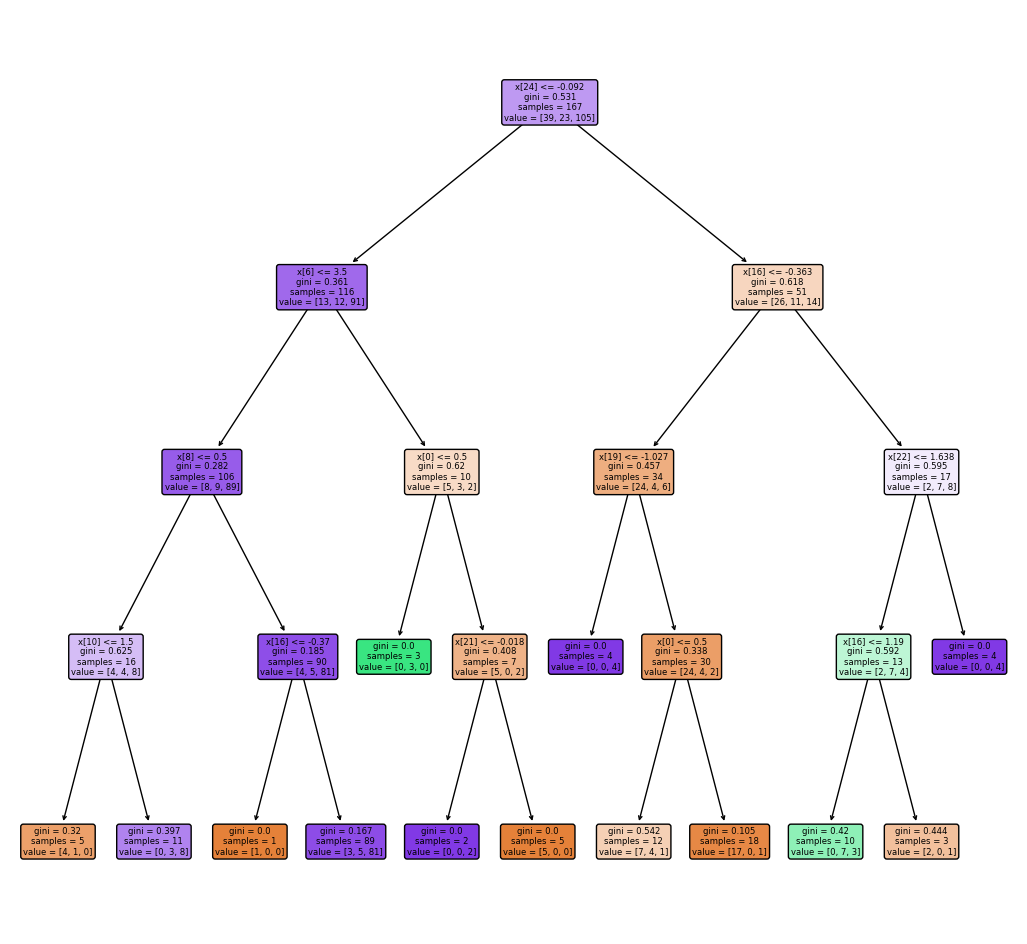

In [245]:
plt.figure(figsize=(13,12))
plot_tree(dec_tree,filled=True,rounded=True,max_depth=4);

## RFE

In [247]:
from sklearn.feature_selection import RFE
features.shape

(223, 27)

In [284]:
rfe= RFE(dec_tree,n_features_to_select=5)

In [285]:
data=rfe.fit(x_train,y_train)

In [286]:
data1=data.get_support()
data1

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False])

In [287]:
data.ranking_

array([ 1, 15, 14, 13, 12, 11,  1, 10,  3, 16,  2, 20, 22, 23, 21, 19,  1,
        9,  8,  1,  7,  4,  5,  6,  1, 17, 18])

In [288]:
features.columns

Index(['ordinal__surgery', 'ordinal__age', 'ordinal__temp_of_extremities',
       'ordinal__peripheral_pulse', 'ordinal__mucous_membrane',
       'ordinal__capillary_refill_time', 'ordinal__pain',
       'ordinal__peristalsis', 'ordinal__abdominal_distention',
       'ordinal__nasogastric_tube', 'ordinal__nasogastric_reflux',
       'ordinal__rectal_exam_feces', 'ordinal__abdomen',
       'ordinal__abdomo_appearance', 'ordinal__surgical_lesion',
       'ordinal__cp_data', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume',
       'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [289]:
arr=np.array(features.columns)
arr

array(['ordinal__surgery', 'ordinal__age', 'ordinal__temp_of_extremities',
       'ordinal__peripheral_pulse', 'ordinal__mucous_membrane',
       'ordinal__capillary_refill_time', 'ordinal__pain',
       'ordinal__peristalsis', 'ordinal__abdominal_distention',
       'ordinal__nasogastric_tube', 'ordinal__nasogastric_reflux',
       'ordinal__rectal_exam_feces', 'ordinal__abdomen',
       'ordinal__abdomo_appearance', 'ordinal__surgical_lesion',
       'ordinal__cp_data', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume',
       'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2',
       'lesion_3'], dtype=object)

In [292]:
rfe.get_support()

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False])

In [290]:
arr.shape

(27,)

In [291]:
arr[data1]

array(['ordinal__surgery', 'ordinal__pain', 'hospital_number',
       'respiratory_rate', 'lesion_1'], dtype=object)

In [293]:
Pno= (2/5)*(2/5)*(4/5)*(5/14)
Pno

0.04571428571428573

In [294]:
Pyes= (3/9)*(6/9)*(3/9)*(9/14)
Pyes

0.04761904761904762

In [295]:
P_no= Pno/(Pno+Pyes)
P_no

0.489795918367347

In [296]:
P_yes= Pyes/(Pno+Pyes)
P_yes

0.510204081632653

In [297]:
x_train

,ordinal__surgery,ordinal__age,ordinal__temp_of_extremities,ordinal__peripheral_pulse,ordinal__mucous_membrane,ordinal__capillary_refill_time,ordinal__pain,ordinal__peristalsis,ordinal__abdominal_distention,ordinal__nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
267,1.0,0.0,1.0,2.0,3.0,1.0,3.0,2.0,1.0,2.0,...,0.038310,-1.067228,-0.588538,0.062143,0.082710,1.429205,-0.209831,-0.677797,-0.139371,-0.057928
196,0.0,0.0,1.0,3.0,3.0,2.0,1.0,0.0,3.0,0.0,...,0.496498,0.895801,0.413087,0.062143,2.404328,-0.529552,-0.209831,-0.418510,-0.139371,-0.057928
132,0.0,0.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,...,-0.419878,-1.139933,-0.338132,0.062143,-0.623870,-0.636047,-0.209831,-0.603715,-0.139371,-0.057928
45,0.0,0.0,0.0,3.0,4.0,2.0,2.0,0.0,2.0,0.0,...,0.038310,1.768258,-0.275531,0.062143,1.394929,-0.605620,-0.209831,-0.084214,-0.139371,-0.057928
38,0.0,0.0,2.0,2.0,3.0,1.0,3.0,2.0,3.0,0.0,...,0.649227,-0.703704,-0.275531,0.062143,-1.431389,-0.601817,2.057862,-0.677797,-0.139371,-0.057928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,3.0,0.0,...,1.871061,-0.631000,2.291133,0.062143,-0.724809,-0.624637,-0.209831,-0.269234,-0.139371,-0.057928
139,1.0,0.0,1.0,2.0,3.0,1.0,1.0,3.0,1.0,0.0,...,-0.114419,-0.994524,-1.277156,0.062143,-1.532329,-0.575193,-0.209831,0.271194,-0.139371,-0.057928
88,0.0,0.0,2.0,2.0,1.0,1.0,3.0,2.0,3.0,2.0,...,1.260144,-0.267476,0.663493,0.062143,-0.421990,-0.567586,-0.209831,0.248229,-0.139371,-0.057928
32,1.0,0.0,3.0,2.0,3.0,1.0,3.0,2.0,0.0,2.0,...,-1.488983,-0.412885,-0.275531,0.062143,-0.321050,-0.601817,-0.209831,-0.268679,-0.139371,-0.057928


## Naive_Bayes

In [298]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB

In [299]:
bern= BernoulliNB()
multi= MultinomialNB()
gauss= GaussianNB()

In [300]:
bern.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [301]:
y_pred= bern.predict(x_test)

In [302]:
accuracy_score(y_test,y_pred)

0.6428571428571429

In [305]:
gauss.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [306]:
y_pred1= gauss.predict(x_test)

In [307]:
accuracy_score(y_test,y_pred1)

0.6071428571428571